<a href="https://colab.research.google.com/github/MOISECHRIST/Tensorflow_DeepLearn_Course/blob/main/Introduction_au_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction au DeepLearning : Regression Linéaire avec DeepLearning

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Chargement des données

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 * CRIM     per capita crime rate by town
 * ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 * INDUS    proportion of non-retail business acres per town
 * CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 * NOX      nitric oxides concentration (parts per 10 million)
 * RM       average number of rooms per dwelling
 * AGE      proportion of owner-occupied units built prior to 1940
 * DIS      weighted distances to five Boston employment centres
 * RAD      index of accessibility to radial highways
 * TAX      full-value property-tax rate per \$10,000
 * PTRATIO  pupil-teacher ratio by town
 * B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 * LSTAT    % lower status of the population
 * MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
data_url = "https://lib.stat.cmu.edu/datasets/boston"
raw_data = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_data.values[::2, :], raw_data.values[1::2, :2]])
target = raw_data.values[1::2, 2]

In [ ]:
target=target.reshape(-1,1)

In [ ]:
raw_data=pd.DataFrame(data)

In [ ]:
raw_data.shape

(506, 13)

In [ ]:
raw_data=raw_data.set_axis(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], axis=1)

In [ ]:
raw_data['MEDV']=target

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
raw_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Introduction aux fonctions et au derivees

Une fonction est une application qui prend en entre une valeur et retourne une sortie.\
On note f : x -> f(x)

In [ ]:
def double(x):
  return 2*x

In [ ]:
def carre(x):
  return x**2

In [ ]:
def triple_carre(x):
  return 3*x**2

In [ ]:
def derivee(fonction, x, dx=0.0001):
  return (fonction(x+dx)-fonction(x))/dx

In [ ]:
def compose(list_fonction, x):
  for f in list_fonction:
    x=f(x)
  return x

In [ ]:
list_func=[double, carre, triple_carre]

In [ ]:
def derivee_compose(list_fonction, x, dx=0.0001):
  tmp=1
  x_tmp=x
  for f in list_fonction:
    tmp*=derivee(f,x_tmp , dx)
    x_tmp=f(x_tmp)
  return tmp

In [ ]:
derivee_compose(list_func, 3)

5184.050400212952

In [ ]:
double_val=double(3)
carre_val=carre(double_val)
derivee(triple_carre, carre_val)*derivee(carre, double_val)*derivee(double, 3)

5184.050400212952

## Fonctions a plusieurs parametres et gradient

On se rappelle de notre ensemble de donnees de depart ou a partir d'une ensemble de caracteristiques, on veut predire le prix d'une maison. \
On aura aussi une fonction f qui prendra en entree un ensemble de caracteristiques {x_1, x_2, ..., x_n} pour predire le prix y_hat d'une maison. \
Ce qui revient a construire une fonction a plusieurs parametres f(x_1, x2, x_3, ..., x_n)=y_hat.

In [ ]:
def func(x,y):
  return x+np.sin(y)*x**2

In [ ]:
func(2,2)

5.637189707302727

In [ ]:
def grad_func(func, x,y):
  L=[]
  tmp=func(x+0.0001, y)
  L.append((tmp-func(x,y))/0.0001)
  tmp=func(x, y+0.0001)
  L.append((tmp-func(x,y))/0.0001)
  return L

In [ ]:
grad_func(func, 2,2)

[4.637280637060925, -1.6647692029092553]

Creons a present une fonction qui va calculer le gradient d'une autre fonction F a plusieurs variables

In [ ]:
def gradient(func, X, dX=0.0001):
  L=[]
  I=np.eye(X.shape[1])*dX
  for i in range(X.shape[1]):
    tmp=func(X+I[:,i])-func(X)
    L.append(tmp/dX)
  return np.array(L)

In [ ]:
X=np.array([[2,2]])

Faisons un test avec une reecriture de notre fonction a plusieurs variables

In [ ]:
def func(X):
  X=X.reshape(-1,1)
  return X[0]+np.sin(X[1])*X[0]**2

In [ ]:
gradient(func, X).reshape(-1)

array([ 4.63728064, -1.6647692 ])

## Creation du modele

Creons a present notre modele Y_hat=W\*X+B \
Et allons l'evaluer avec :
  - la moyenne des erreurs : ∑((Y-Y_hat)**2)/n
  - la racine carrée de la moyenne des erreurs : √(∑((Y-Y_hat)**2)/n)
  - la moyenne des valeurs absolues des ecart : ∑(|Y-Y_hat|/n)


In [ ]:
def linear_function(X, W, B):
  return np.dot(X, W)+B

In [ ]:
def MSE(y, y_hat):
  return np.mean((y-y_hat)**2)

In [ ]:
def RMSE(y, y_hat):
  return np.sqrt(np.mean((y-y_hat)**2))

In [ ]:
def MAE(y, y_hat):
  return np.mean(np.abs(y-y_hat))

In [ ]:
def linear_forward(X, y, W, B):
  y_hat=linear_function(X, W, B)
  return MSE(y, y_hat)

Calculons le gradient des poids de notre modele

In [ ]:
def gradient(func, X, Y ,params, dX=0.001):
  grads={}
  grads['W']=[]
  I=np.eye(params['W'].shape[0])*dX
  for i in range(params['W'].shape[0]):
    tmp1=func(X, Y, params['W']+I[i,:].reshape(-1,1), params['B'])
    grads['W'].append((tmp1-func(X, Y, params['W'], params['B']))/dX)
  tmp2=func(X, Y, params['W'], params['B']+dX)
  grads['B']=(tmp2-func(X, Y, params['W'], params['B']))/dX
  grads['B']=np.array(grads['B'])
  grads['W']=np.array(grads['W'])
  return grads


In [ ]:
W=np.random.randn(13,1)
B=np.random.randn(1)

In [ ]:
params={'W':W, 'B':B}

In [ ]:
X=np.array(raw_data.drop('MEDV', axis=1))
y=np.array(raw_data['MEDV'])

In [ ]:
y=y.reshape(-1,1)
y.shape

(506, 1)

In [ ]:
grads = gradient(linear_forward, X, y, params)

In [ ]:
grads['W'].shape

(13,)

Une fonction de retropropagation pour ameliorer les poids du modele et reduire l'erreur

In [ ]:
def backword(W, dW, B, dB, lr=0.1):
  W=W.reshape(-1,1)
  dW=dW.reshape(-1,1)
  W=W-lr*dW
  B=B-lr*dB
  return W, B

In [ ]:
W1, B1 = backword(W, grads['W'], B, grads['B'])

In [ ]:
W1.shape, W.shape

((13, 1), (13, 1))

In [ ]:
B1, B

(array([-115.61217056]), array([0.26152119]))

## Entrainement du modèle

Entrainons notre modele

In [ ]:
def early_stopping(loss: list(), pas=5)->bool:
  if len(loss)<pas+1:
    return False
  tmp=0
  for i in range(len(loss)-pas-1, len(loss)-1):
    tmp=tmp+(loss[i+1]>=loss[i])
  if tmp>2:
    return True
  else:
    return False

In [ ]:
def train_model(X, y, activation=linear_function, forward_func=linear_forward, loss_func=RMSE, epochs=2, lr=0.1, random_state=0, train_control=None):
  np.random.seed(random_state)
  W=np.random.randn(X.shape[1],1)
  B=np.random.randn(1)/100
  params={'W':W, 'B':B}
  loss=[]
  for i in range(epochs):
    if train_control is not None:
      if train_control(loss):
        break
    y_hat=activation(X, W, B)
    l=loss_func(y, y_hat)
    print(f"epoch {i}.................loss: {l:.6f}")
    loss.append(l)
    grads = gradient(forward_func, X, y, params)
    W, B = backword(W, grads['W'], B, grads['B'], lr)
    params={'W':W, 'B':B}
  return params, loss

Traitement des données

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
scalar=StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
params_rmse, loss_rmse=train_model(X_train, y_train, epochs=100, lr=0.1, train_control=early_stopping)

epoch 0.................loss: 26.231701
epoch 1.................loss: 19.515283
epoch 2.................loss: 15.784915
epoch 3.................loss: 12.950677
epoch 4.................loss: 10.757277
epoch 5.................loss: 9.077052
epoch 6.................loss: 7.809626
epoch 7.................loss: 6.871166
epoch 8.................loss: 6.190189
epoch 9.................loss: 5.705694
epoch 10.................loss: 5.366761
epoch 11.................loss: 5.132522
epoch 12.................loss: 4.971647
epoch 13.................loss: 4.861143
epoch 14.................loss: 4.784728
epoch 15.................loss: 4.731186
epoch 16.................loss: 4.692940
epoch 17.................loss: 4.664931
epoch 18.................loss: 4.643813
epoch 19.................loss: 4.627377
epoch 20.................loss: 4.614166
epoch 21.................loss: 4.603220
epoch 22.................loss: 4.593901
epoch 23.................loss: 4.585782
epoch 24.................loss: 4.578577
epoch

In [ ]:
params_mae, loss_mae=train_model(X_train, y_train, epochs=100, lr=0.1, loss_func=MAE)

epoch 0.................loss: 23.053018
epoch 1.................loss: 18.195511
epoch 2.................loss: 14.558022
epoch 3.................loss: 11.657444
epoch 4.................loss: 9.379838
epoch 5.................loss: 7.572148
epoch 6.................loss: 6.168409
epoch 7.................loss: 5.127475
epoch 8.................loss: 4.391558
epoch 9.................loss: 3.892304
epoch 10.................loss: 3.554497
epoch 11.................loss: 3.328776
epoch 12.................loss: 3.197444
epoch 13.................loss: 3.129205
epoch 14.................loss: 3.090942
epoch 15.................loss: 3.070849
epoch 16.................loss: 3.062647
epoch 17.................loss: 3.064529
epoch 18.................loss: 3.068037
epoch 19.................loss: 3.072709
epoch 20.................loss: 3.077928
epoch 21.................loss: 3.083086
epoch 22.................loss: 3.088224
epoch 23.................loss: 3.092391
epoch 24.................loss: 3.095934
epoch 

In [ ]:
params_mae_es, loss_mae_es=train_model(X_train, y_train, epochs=100, lr=0.1, loss_func=MAE, train_control=early_stopping)

epoch 0.................loss: 23.053018
epoch 1.................loss: 18.195511
epoch 2.................loss: 14.558022
epoch 3.................loss: 11.657444
epoch 4.................loss: 9.379838
epoch 5.................loss: 7.572148
epoch 6.................loss: 6.168409
epoch 7.................loss: 5.127475
epoch 8.................loss: 4.391558
epoch 9.................loss: 3.892304
epoch 10.................loss: 3.554497
epoch 11.................loss: 3.328776
epoch 12.................loss: 3.197444
epoch 13.................loss: 3.129205
epoch 14.................loss: 3.090942
epoch 15.................loss: 3.070849
epoch 16.................loss: 3.062647
epoch 17.................loss: 3.064529
epoch 18.................loss: 3.068037
epoch 19.................loss: 3.072709


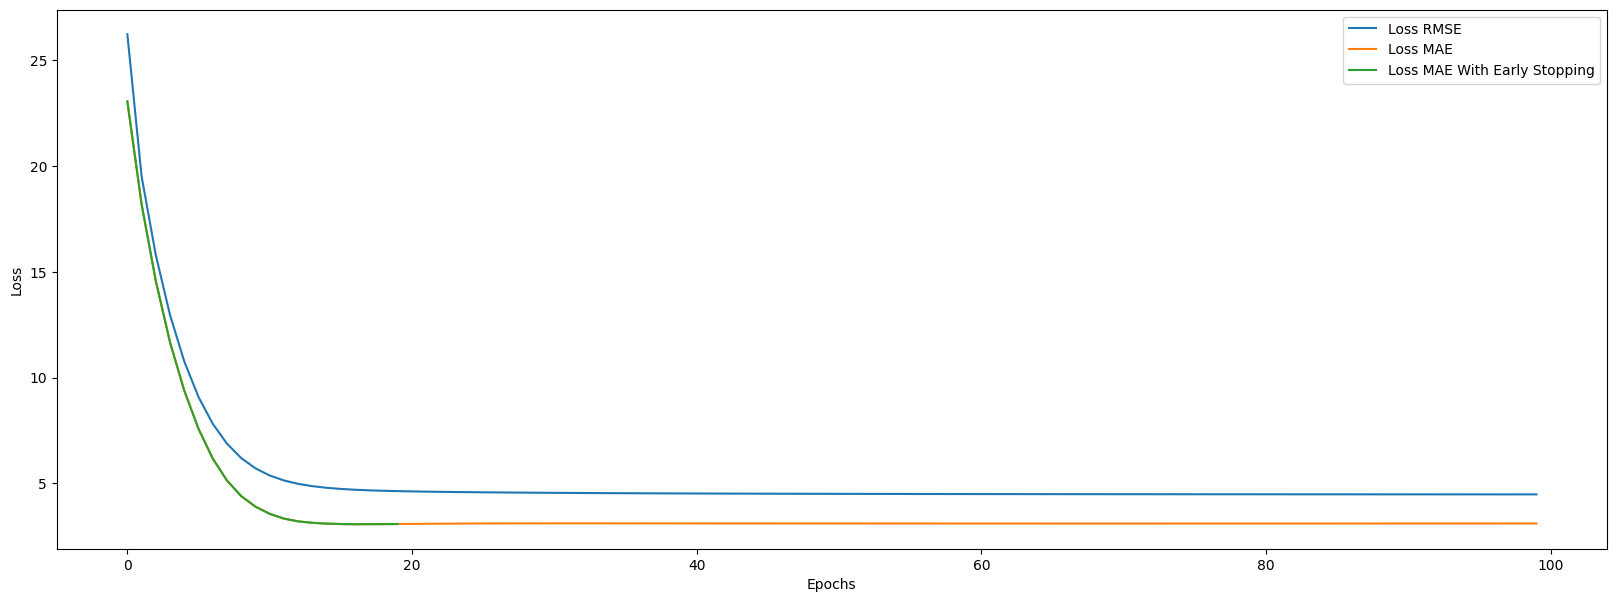

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(loss_rmse, label='Loss RMSE')
plt.plot(loss_mae, label='Loss MAE')
plt.plot(loss_mae_es, label='Loss MAE With Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation du modèle

In [ ]:
y_hat=linear_function(X_test, params_mae['W'], params_mae['B'])

In [ ]:
y_hat[3], y_test[3]

(array([11.90442125]), array([8.3]))

In [ ]:
MAE(y_test, y_hat), loss_mae[-1]

(3.6313362434827847, 3.0972709453993876)

In [ ]:
RMSE(y_test, y_hat), loss_rmse[-1]

(5.24638129512343, 4.473550397208738)

In [ ]:
feature_labels=['per capita crime rate by town',
'proportion of residential land zoned for lots over 25,000 sq.ft.',
'proportion of non-retail business acres per town',
'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
'nitric oxides concentration (parts per 10 million)',
'average number of rooms per dwelling',
'proportion of owner-occupied units built prior to 1940',
'weighted distances to five Boston employment centres',
'index of accessibility to radial highways',
'full-value property-tax rate per $10,000',
'pupil-teacher ratio by town',
'1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
'% lower status of the population',
'Median value of owner-occupied homes in $1000\'s']

In [ ]:
feature_labels[np.argmax(params_rmse['W'])],np.max(params_rmse['W'])

('average number of rooms per dwelling', 2.7688564883435447)

In [ ]:
feature_labels[np.argmin(params_rmse['W'])], np.min(params_rmse['W'])

('% lower status of the population', -3.419215637361075)

In [ ]:
feature_labels[np.argmax(params_mae_es['W'])],np.max(params_mae_es['W'])

('average number of rooms per dwelling', 3.163135924761022)

In [ ]:
feature_labels[np.argmin(params_mae_es['W'])],np.min(params_mae_es['W'])

('% lower status of the population', -3.2644709948471706)

<Axes: >

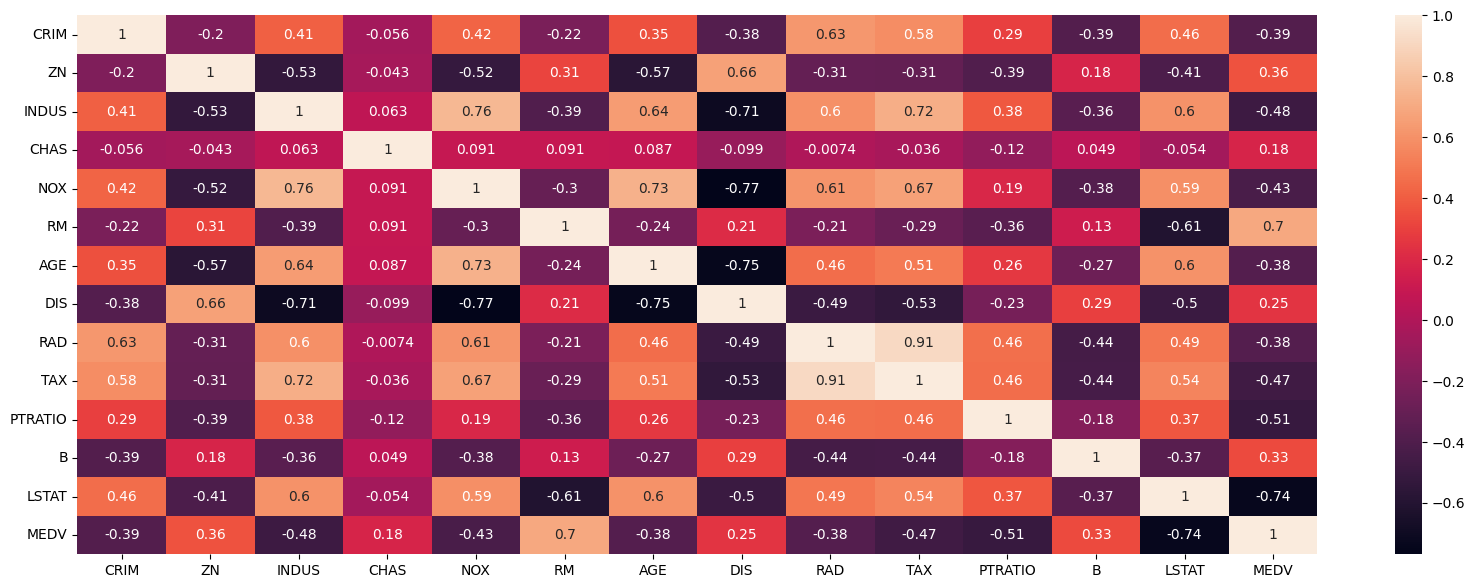

In [ ]:
plt.figure(figsize=(20, 7))
sns.heatmap(raw_data.corr(), annot=True)

On observe que le nombre moyen de pieces par logement a la valeeur de poids la plus grande ce qui va dans le meme sens que la matrice de correlation.\
La meme observation est effectué sur le % de la population de niveau faible ou le poids a la valeur la plus basse ce qui correspond aussi a ce que nous avons obtenu sur la matrice de correlation.

Nous venons de créer de nous même un modèle de regression linéaire avec le DeepLearning\
A présent nous allons le comparer avec le modele de regression linéaire de sklearn

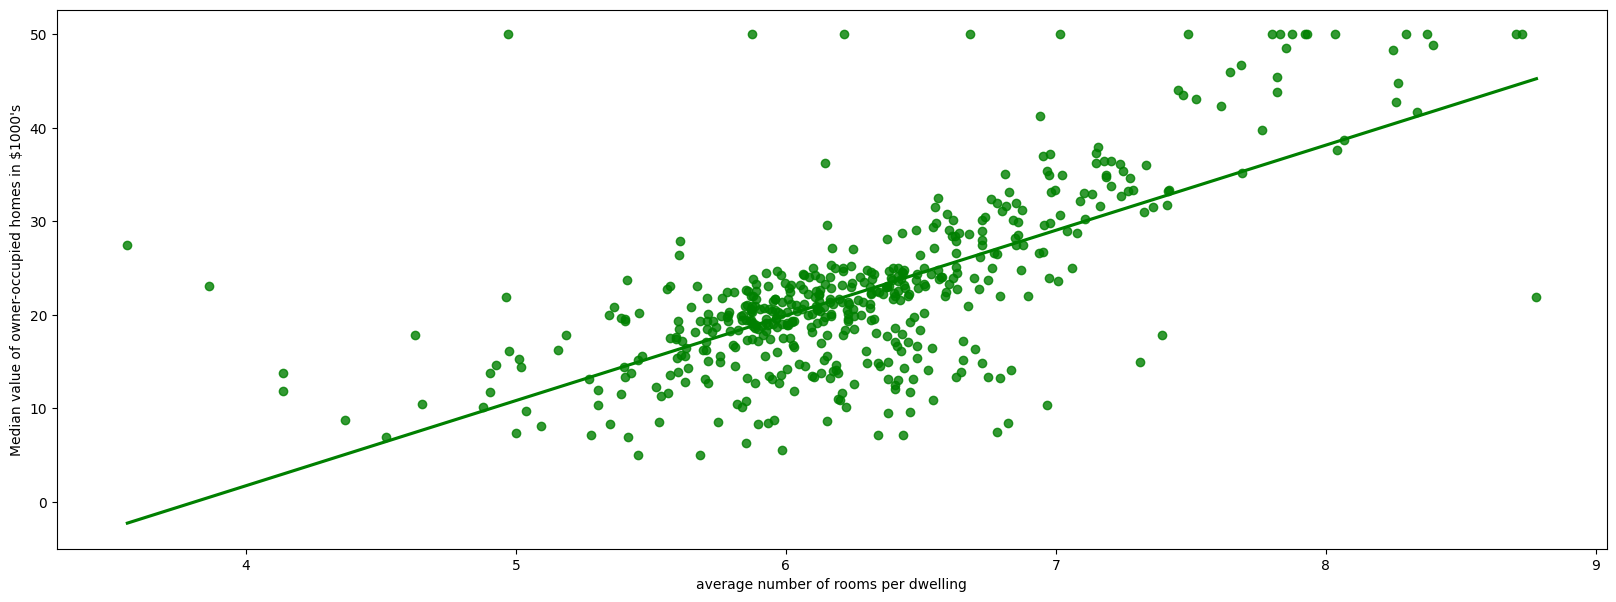

In [ ]:
plt.figure(figsize=(20,7))
sns.regplot(raw_data, x='RM', y='MEDV', color='green', ci=0)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.show()

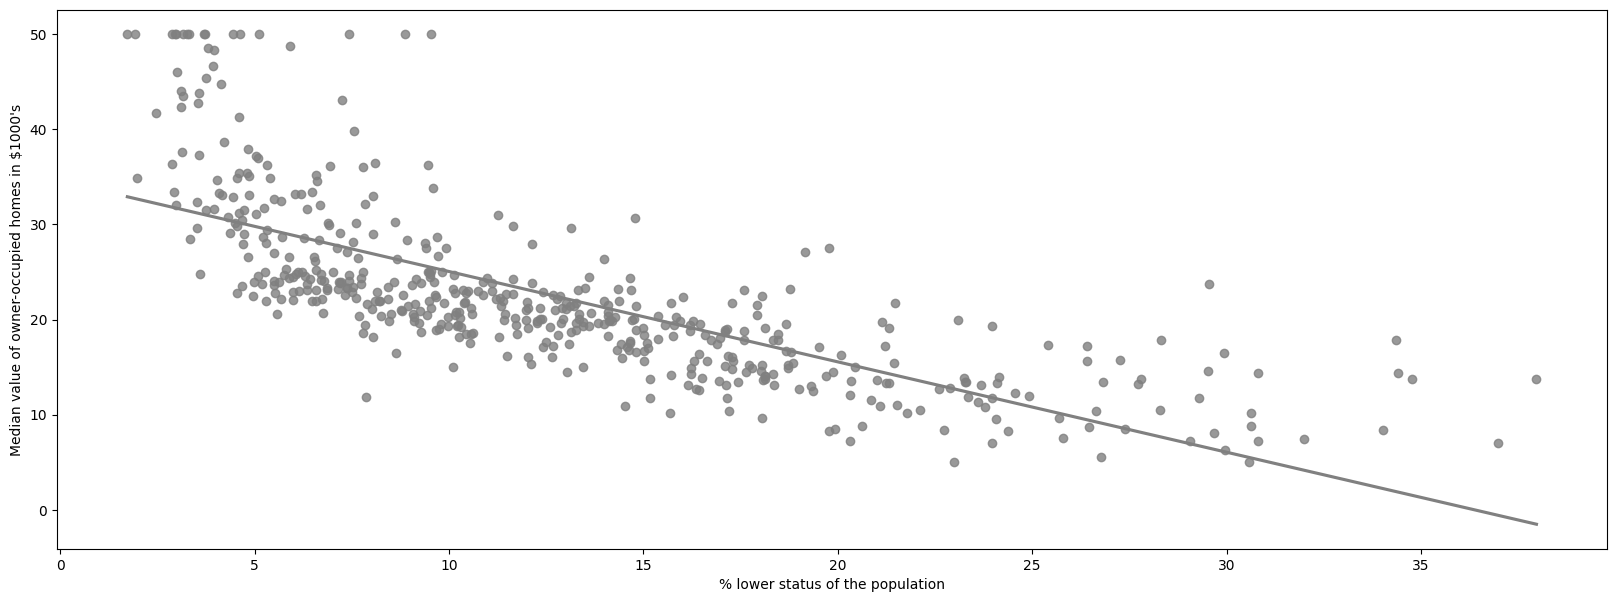

In [ ]:
plt.figure(figsize=(20,7))
sns.regplot(raw_data, x='LSTAT', y='MEDV', color='grey',ci=0)
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.show()

## Comparaison avec modèle de regression linéaire

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
RMSE(y_train,model.predict(X_train)), loss_rmse[-1]

(4.4674623461466405, 4.473550397208738)

In [ ]:
MAE(y_train,model.predict(X_train)), loss_mae[-1]

(3.1036061039080045, 3.0972709453993876)

In [ ]:
MAE(y_test,model.predict(X_test)), MAE(y_test, linear_function(X_test, params_mae['W'], params_mae['B']))

(3.6099040603818127, 3.6313362434827847)

In [ ]:
RMSE(y_test,model.predict(X_test)), RMSE(y_test, linear_function(X_test, params_rmse['W'], params_mae['B']))

(5.214975145375402, 5.24638129512343)

On constate qu'il n'y a pas une grande différence entre notre modèle et celui de sklearn.

# Construction d'un modèle non-linéaire

## Definition d'un modèle non-linéaire

Considérons à présent que notre modèle est de la forme :
f(W1\*X+B1)\*W2+B2\
Où f est une fonction non-linéaire.\
L'idée ici est de resoudre le problème où on veut approximer un jeux de données non-linéaire avec une fonction lignéaire.\
**NB** : La fonction f doit respecter un ensemble de critères :
- Dérivable sur R
- Monotone
- Facile à dériver\

Pour ce travail, nous allons utiliser la fonction **Sigmoid** qui respecte les critères ci-dessus et qui est très utilisé en DeepLearning.\
**Sigmoid(X) = 1/(1+exp(-X))**

In [ ]:
def sigmoid(X):
  return 1/(1+np.exp(-X))

## Creation du modèle

In [ ]:
def sigmoid_forward(X, y, W1, B1, W2, B2):
  y_tmp=sigmoid(linear_function(X, W1, B1))
  y_hat=linear_function(y_tmp, W2, B2)
  return MSE(y, y_hat)

In [ ]:
def gradient(func, X, Y, params, dX=0.001):
  grads={}
  grads['W1']=[]
  grads['W2']=[]
  grads['B1']=[]
  grads['B2']=[]

  #dL/dW2
  I=np.eye(params['W2'].shape[0])*dX
  for i in range(params['W2'].shape[0]):
    tmp1=func(X, Y, params['W1'], params['B1'], params['W2']+I[i,:].reshape(-1,1), params['B2'])
    grads['W2'].append((tmp1-func(X, Y, params['W1'], params['B1'], params['W2'], params['B2']))/dX)

  #dL/dB2
  tmp2=func(X, Y, params['W1'], params['B1'], params['W2'], params['B2']+dX)
  grads['B2']=(tmp2-func(X, Y, params['W1'], params['B1'], params['W2'], params['B2']))/dX

  #dL/dW1

  for i in range(params['W1'].shape[0]):
    line=[]
    for j in range(params['W1'].shape[1]):
      W1=params['W1']
      W1[i,j]+=dX
      tmp1=func(X, Y, W1, params['B1'], params['W2'].reshape(-1,1), params['B2'])
      line.append((tmp1-func(X, Y, params['W1'], params['B1'], params['W2'], params['B2']))/dX)
    grads['W1'].append(line)

  #dL/dB1
  I=np.eye(params['B1'].shape[0])*dX
  for i in range(params['B1'].shape[0]):
    tmp1=func(X, Y, params['W1'], params['B1']+I[i,:], params['W2'], params['B2'])
    grads['B1'].append((tmp1-func(X, Y, params['W1'], params['B1'], params['W2'], params['B2']))/dX)

  grads['B1']=np.array(grads['B1'])
  grads['W1']=np.array(grads['W1'])
  grads['B2']=np.array(grads['B2']).reshape(-1,1)
  grads['W2']=np.array(grads['W2']).reshape(-1,1)
  return grads

On teste si toutes nos fonctions s'executent correctement

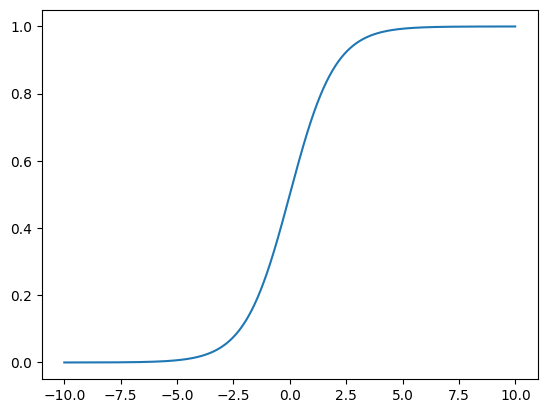

In [ ]:
plt.plot(np.arange(start=-10,stop=10,step=0.01), sigmoid(np.arange(start=-10,stop=10,step=0.01)))

In [ ]:
W1=np.random.randn(X.shape[1],X.shape[1])
W2=np.random.randn(X.shape[1],1)
B1=np.random.randn(X.shape[1])
B2=np.random.randn(1,1)

In [ ]:
W1.shape, W2.shape, B1.shape, B2.shape

((13, 13), (13, 1), (13,), (1, 1))

In [ ]:
sigmoid_forward(X_train, y_train, W1, B1, W2, B2), linear_forward(X_train, y_train, W2, B2)

(479.1364278740302, 610.8063516495927)

In [ ]:
sigmoid_params={'W1':W1, 'B1':B1, 'W2':W2, 'B2':B2}

In [ ]:
grads=gradient(sigmoid_forward, X_train, y_train, sigmoid_params)

In [ ]:
grads['W1'].shape, grads['W2'].shape, grads['B1'].shape, grads['B2'].shape

((13, 13), (13, 1), (13,), (1, 1))

In [ ]:
(sigmoid_params['W1']-0.1*grads['W1']).shape

(13, 13)

In [ ]:
def sigmoid_backword(params, grads,lr=0.1):
  for key in params.keys():
    params[key]=params[key]-lr*grads[key]
  return params

In [181]:
def train_none_linear_model(X, y, activation, forward_func=sigmoid_forward, loss_func=RMSE, epochs=100, lr=0.1, random_state=0, train_control=None, nb_hidden_layer=None):
  np.random.seed(random_state)
  if nb_hidden_layer is None:
    nb_hidden_layer=X.shape[1]
  W1=np.random.randn(X.shape[1],nb_hidden_layer)
  W2=np.random.randn(nb_hidden_layer,1)
  B1=np.random.randn(nb_hidden_layer)
  B2=np.random.randn(1,1)
  loss=[]
  params={'W1':W1, 'B1':B1, 'W2':W2, 'B2':B2}
  for i in range(epochs):
    if train_control is not None:
      if train_control(loss):
        break
    y_hat=activation(X, params)
    l=loss_func(y, y_hat)
    print(f"epoch {i} :.................loss: {l:.6f}")
    loss.append(l)
    grads = gradient(forward_func, X, y, params)
    params=sigmoid_backword(params, grads,lr)
  return params, loss

In [167]:
activation = lambda X, params: linear_function(sigmoid(linear_function(X, params['W1'], params['B1'])), params['W2'], params['B2'])

In [168]:
activation(X_train, sigmoid_params).shape

(354, 1)

In [188]:
params_nl_mae, loss_nl_mae = train_none_linear_model(X_train, y_train, activation, epochs=100, lr=0.1, loss_func=MAE, nb_hidden_layer=20)

epoch 0 :.................loss: 25.283235
epoch 1 :.................loss: 12.284460
epoch 2 :.................loss: 8.104591
epoch 3 :.................loss: 5.910462
epoch 4 :.................loss: 5.038789
epoch 5 :.................loss: 4.980869
epoch 6 :.................loss: 4.752529
epoch 7 :.................loss: 4.694741
epoch 8 :.................loss: 4.594144
epoch 9 :.................loss: 4.533461
epoch 10 :.................loss: 4.465858
epoch 11 :.................loss: 4.408638
epoch 12 :.................loss: 4.355432
epoch 13 :.................loss: 4.309555
epoch 14 :.................loss: 4.269981
epoch 15 :.................loss: 4.235606
epoch 16 :.................loss: 4.204053
epoch 17 :.................loss: 4.174099
epoch 18 :.................loss: 4.145469
epoch 19 :.................loss: 4.119320
epoch 20 :.................loss: 4.093832
epoch 21 :.................loss: 4.068849
epoch 22 :.................loss: 4.044204
epoch 23 :.................loss: 4.020224


In [187]:
params_nl_rmse, loss_nl_rmse = train_none_linear_model(X_train, y_train, activation, epochs=100, lr=0.1, loss_func=RMSE, nb_hidden_layer=20)

epoch 0 :.................loss: 26.815695
epoch 1 :.................loss: 13.785639
epoch 2 :.................loss: 10.530709
epoch 3 :.................loss: 7.834389
epoch 4 :.................loss: 7.333047
epoch 5 :.................loss: 7.051867
epoch 6 :.................loss: 6.854737
epoch 7 :.................loss: 6.695678
epoch 8 :.................loss: 6.562869
epoch 9 :.................loss: 6.449975
epoch 10 :.................loss: 6.352900
epoch 11 :.................loss: 6.268470
epoch 12 :.................loss: 6.194244
epoch 13 :.................loss: 6.128282
epoch 14 :.................loss: 6.069059
epoch 15 :.................loss: 6.015367
epoch 16 :.................loss: 5.966246
epoch 17 :.................loss: 5.920934
epoch 18 :.................loss: 5.878823
epoch 19 :.................loss: 5.839428
epoch 20 :.................loss: 5.802358
epoch 21 :.................loss: 5.767297
epoch 22 :.................loss: 5.733990
epoch 23 :.................loss: 5.702230

## Evaluation du modèle

In [189]:
RMSE(y_train,model.predict(X_train)), loss_rmse[-1], loss_nl_rmse[-1]

(4.4674623461466405, 4.473550397208738, 4.610857400531159)

In [190]:
MAE(y_train,model.predict(X_train)), loss_mae[-1], loss_nl_mae[-1]

(3.1036061039080045, 3.0972709453993876, 3.1336712946574625)

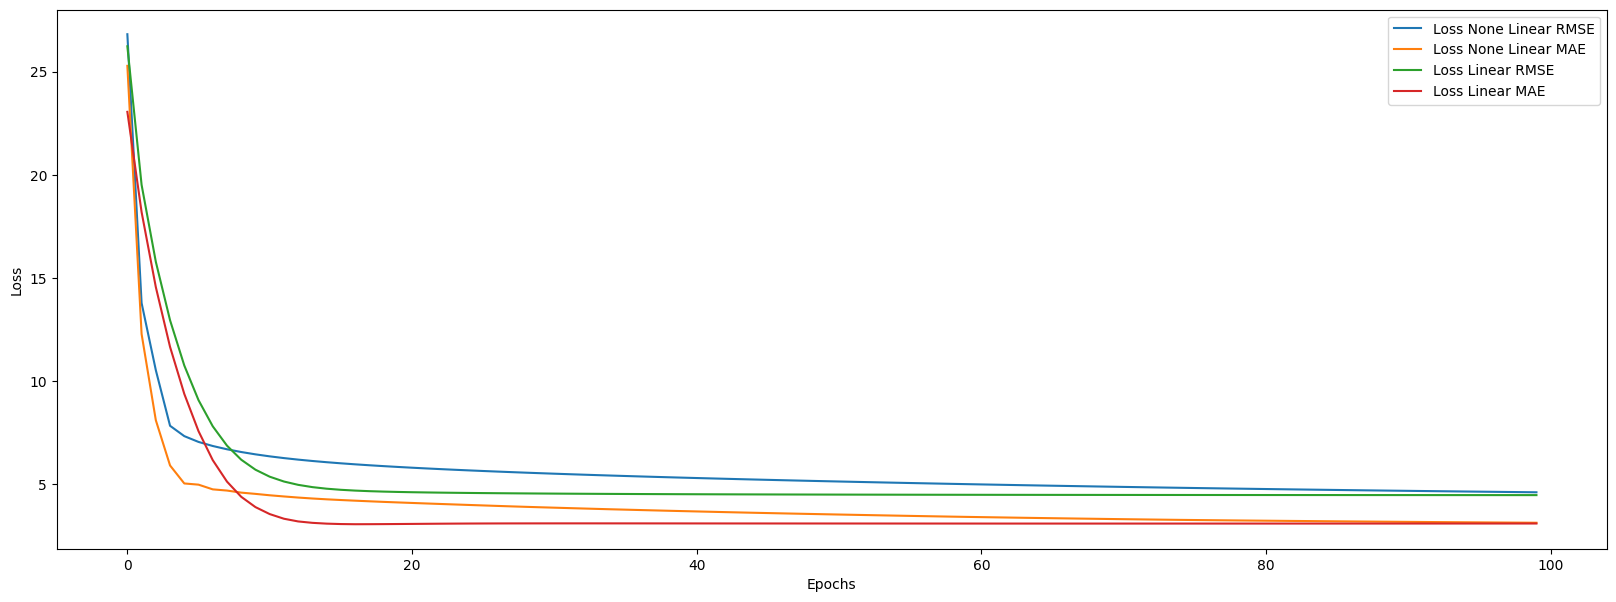

In [191]:
plt.figure(figsize=(20,7))
plt.plot(loss_nl_rmse, label='Loss None Linear RMSE')
plt.plot(loss_nl_mae, label='Loss None Linear MAE')
plt.plot(loss_rmse, label='Loss Linear RMSE')
plt.plot(loss_mae, label='Loss Linear MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [192]:
y_hat_nl=activation(X_test, params_nl_mae)

In [193]:
MAE(y_test, y_hat), MAE(y_test, y_hat_nl), loss_mae[-1],loss_nl_mae[-1]

(3.6313362434827847, 3.641051685175255, 3.0972709453993876, 3.1336712946574625)

In [194]:
RMSE(y_test, y_hat), RMSE(y_test, y_hat_nl), loss_rmse[-1],loss_nl_rmse[-1]

(5.24638129512343, 5.657902745805298, 4.473550397208738, 4.610857400531159)